<a href="https://colab.research.google.com/github/plaban1981/churn-prediction/blob/master/Customer_Segmentation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Identifying customer segments is critical since it helps companies to better target their marketing campaings to win most profitable customers.

In [0]:
from google.colab import files
files.upload()

Saving Wikipedia SP 500 Dataset.csv to Wikipedia SP 500 Dataset.csv


{'Wikipedia SP 500 Dataset.csv': b"Title,Category,Text\r\nApple Inc.,Information Technology, nasdaq 100 component s p 500 component foundation founder location city apple campus 1 infinite loop street infinite loop cupertino california cupertino california location country united states u s locations 406 retail stores may 2013 area served worldwide key people ref tim cook ceo steve jobs founder former ceo industry products services market capitalization 446b operating income us 48 999 nbsp billion 2013 subsid homepage apple inc is an american multinational corporation headquartered in cupertino california cupertino california that designs develops and sells consumer electronics computer software and personal computers its best known hardware products are the macintosh mac line of computers the ipod mobile digital media player media player the iphone smartphone and the ipad tablet computer its consumer software includes the os x and ios operating systems the itunes media browser the saf

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('Wikipedia SP 500 Dataset.csv')
df.head()

Title  ...                                               Text
0        Apple Inc.  ...   nasdaq 100 component s p 500 component founda...
1     Adobe Systems  ...   br nasdaq 100 nasdaq 100 component br s p 500...
2    General Motors  ...   s p 500 s p 500 component industry automotive...
3  General Electric  ...   s p 500 s p 500 component industry conglomera...
4   Harley-Davidson  ...   br s p 500 s p 500 component foundation 1903 ...

[5 rows x 3 columns]

## Schema of the dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 3 columns):
Title       466 non-null object
Category    466 non-null object
Text        466 non-null object
dtypes: object(3)
memory usage: 11.0+ KB


## Feature Hashing 

#### Hashing with HashingVectorizer

In Machine Learning the input features can be free text.A common approach to represent free text is using bag of words.Each word is represented as a token.Every time a word appears in the text , a 1 is assigned to the token. And if the word does not apear a 0 is aasigned.
However bag of words model will not scale because the number of possible words is not known before hand.

Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large.

This, in turn, will require large vectors for encoding documents and impose large requirements on memory and slow down algorithms.

A clever work around is to use a one way hash of words to convert them to integers. The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector.

#### Disadvantage 
A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).

The HashingVectorizer class implements this approach that can be used to consistently hash words, then tokenize and encode documents as needed.

#### Convert a collection of text documents to a matrix of token occurrences.Here Hashing bit size is set to 12

In [0]:
from  sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(2,2),n_features=100)

In [0]:
# encode document
vector = vectorizer.transform(df['Text'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(466, 100)
[[-0.05464258  0.05464258 -0.02483754 ...  0.04967507 -0.09438263
   0.00993501]
 [-0.04324893  0.14055902  0.0648734  ...  0.0648734  -0.10812233
   0.05406116]
 [ 0.07178657  0.          0.         ...  0.02871463 -0.10767985
   0.05742925]
 ...
 [-0.04749643  0.         -0.07599428 ...  0.16148785  0.02849786
  -0.00949929]
 [ 0.         -0.17888544  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.36380344 ...  0.          0.
  -0.12126781]]


In [0]:
df_text = pd.DataFrame(vector.toarray())
df_text.head()

0         1         2   ...        97        98        99
0 -0.054643  0.054643 -0.024838  ...  0.049675 -0.094383  0.009935
1 -0.043249  0.140559  0.064873  ...  0.064873 -0.108122  0.054061
2  0.071787  0.000000  0.000000  ...  0.028715 -0.107680  0.057429
3  0.009458 -0.028374 -0.151328  ...  0.104038 -0.018916  0.018916
4  0.048997  0.111357  0.044543  ... -0.057905  0.035634  0.040088

[5 rows x 100 columns]

##Label Encoding

In [0]:
df_new = df[['Title','Category']]

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in df_new.columns:
  encoded = i+'_encoded'
  df_new[encoded] = lb.fit_transform(df_new[i])

In [0]:
df_new.head()

Title                Category  Title_encoded  Category_encoded
0        Apple Inc.  Information Technology             36                 6
1     Adobe Systems  Information Technology              7                 6
2    General Motors  Consumer Discretionary            187                 0
3  General Electric                  Energy            184                 2
4   Harley-Davidson  Consumer Discretionary            197                 0

##Identifying the right features
After feature hashing is performed a large number of features have been computed based on the descriptive text.

#### PCA -Principal Component Analysis is a powerful technique that can be used for identifying a smaller number of features that capture the essense of the original features

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
reduced_features = pca.fit_transform(df_text.values)

In [0]:
reduced_features.shape

(466, 10)

In [0]:
columns = ['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10']

In [0]:
df_reduced = pd.DataFrame(reduced_features,columns=columns)

In [40]:
df_reduced.shape

(466, 10)

## Final Training dataset

In [0]:
df_train = pd.concat([df_new[['Title_encoded','Category_encoded']],df_reduced],axis=1)

In [46]:
df_train.shape

(466, 12)

In [47]:
df_train.head()

Title_encoded  Category_encoded  feature1  ...  feature8  feature9  feature10
0             36                 6  0.487300  ...  0.161925 -0.067043   0.156969
1              7                 6  0.213893  ... -0.310518  0.162120   0.107843
2            187                 0  0.260965  ...  0.049900  0.091512   0.017869
3            184                 2  0.111418  ...  0.161475 -0.049846  -0.016216
4            197                 0  0.126385  ...  0.121223  0.191286  -0.036758

[5 rows x 12 columns]

## Applying Unsupervised Learning technique (Kmeans) to determine the customer segments or grouping

#### Determine the optimal number of clusters or K values

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Normalization of training data

In [0]:
mms = MinMaxScaler()
mms.fit(df_train)
data_transformed = mms.transform(df_train)

In [50]:
data_transformed.shape

(466, 12)

In [53]:
data_transformed[:5,:]

array([[0.07741935, 0.66666667, 1.        , 0.39950197, 0.47881027,
        0.54229257, 0.32400539, 0.59303879, 0.47935629, 0.71669991,
        0.32753775, 0.64480301],
       [0.01505376, 0.66666667, 0.69598718, 0.56711376, 0.46563871,
        0.70356544, 0.6284007 , 0.41811388, 0.49092148, 0.03920218,
        0.60867609, 0.58261706],
       [0.40215054, 0.        , 0.74832864, 0.58157286, 0.48504498,
        0.47331441, 0.32380699, 0.46884773, 0.33751983, 0.55605221,
        0.52205382, 0.46872192],
       [0.39569892, 0.22222222, 0.58204126, 0.59942637, 0.45355315,
        0.36103408, 0.29165198, 0.46375884, 0.54896355, 0.71605485,
        0.34863504, 0.42557563],
       [0.42365591, 0.        , 0.59868458, 0.35218494, 0.3336222 ,
        0.37402792, 0.39187282, 0.6644795 , 0.37573587, 0.65833175,
        0.6444562 , 0.3995727 ]])

In [0]:
Sum_of_squared_distances = {}
K = range(1,31)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data_transformed)
  Sum_of_squared_distances[k] = kmeans.inertia_


In [63]:
Sum_of_squared_distances 

{1: 213.85032564806414,
 2: 184.00671893297795,
 3: 166.27862368935754,
 4: 155.68457625821756,
 5: 150.2124546853919,
 6: 145.29999439583014,
 7: 141.53552511702927,
 8: 138.66721164884888,
 9: 136.0361333831522,
 10: 133.48479197922413,
 11: 131.38039014246107,
 12: 128.66003720599264,
 13: 126.47739076141615,
 14: 123.89293786427848,
 15: 122.53171134572345,
 16: 120.76623268166446,
 17: 119.35690324800439,
 18: 117.50270753894593,
 19: 117.12454327902898,
 20: 114.35698821040066,
 21: 113.7680268987798,
 22: 110.94906025981501,
 23: 111.11459173223938,
 24: 109.42551037570777,
 25: 107.5193345521606,
 26: 106.8083183358847,
 27: 106.4016005459276,
 28: 105.32189230855434,
 29: 103.68006318477396,
 30: 103.38279398451488}

## Elbow plot

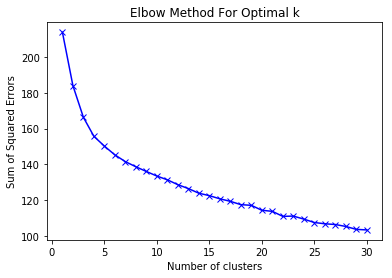

In [64]:
import matplotlib.pyplot as plt
plt.plot(Sum_of_squared_distances.keys(),Sum_of_squared_distances.values(),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method For Optimal k')
plt.show()

## Optimal value of K = 10, as determined from above elbow plot

In [0]:
kmeans = KMeans(n_clusters =10,random_state=1)
kmeans.fit(data_transformed)
clusters = kmeans.predict(data_transformed)

In [95]:
len(clusters)

466

In [0]:
df['Customer_Segment'] = clusters

In [97]:
df.head()

Title  ... Customer_Segment
0        Apple Inc.  ...                2
1     Adobe Systems  ...                2
2    General Motors  ...                5
3  General Electric  ...                4
4   Harley-Davidson  ...                5

[5 rows x 4 columns]

In [98]:
df.tail()

Title  ... Customer_Segment
461         QEP Resources  ...                0
462              Prologis  ...                4
463                   IBM  ...                6
464  Edwards Lifesciences  ...                6
465              Allegion  ...                6

[5 rows x 4 columns]

In [99]:
df[['Category','Customer_Segment']].nunique()

Category            10
Customer_Segment    10
dtype: int64

In [100]:
df[df['Customer_Segment'] == 5].head()

Title  ... Customer_Segment
2     General Motors  ...                5
4    Harley-Davidson  ...                5
22            Hasbro  ...                5
33  News Corporation  ...                5
34            Hormel  ...                5

[5 rows x 4 columns]